In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
FEATURE_DIR="Data/features/"

In [2]:
features=np.load(FEATURE_DIR+"ResNet50_avg_RGB.npy")
pins=pd.read_pickle("Data/pins_RGB.pkl")
pins.head()

,Path,Images
0,Data/PP_pins/000337a0ee7432d5453c7016a757d410.jpg,"[[[255, 255, 255], [255, 255, 255], [255, 255,..."
1,Data/PP_pins/00201308aafb382364df742cd2c88367.jpg,"[[[94, 55, 84], [118, 80, 119], [100, 63, 115]..."
2,Data/PP_pins/00264f7f0e84a86fddd2dc390941c044.jpg,"[[[228, 237, 216], [228, 238, 214], [225, 233,..."
3,Data/PP_pins/0027d4a15fbca7694c80a3a96383292c.jpg,"[[[14, 63, 77], [15, 64, 78], [15, 64, 78], [1..."
4,Data/PP_pins/0028f6bcf10b0b32b8e5774fc21cc305.jpg,"[[[187, 188, 182], [188, 191, 184], [187, 189,..."


In [3]:
from sklearn.metrics.pairwise import euclidean_distances

euc_distances=euclidean_distances(features)
euc_distances[euc_distances==0]=np.nan

In [4]:
print(np.nanmax(euc_distances))
print(np.nanmean(euc_distances))
print(np.nanmin(euc_distances))

print(np.mean(np.nanmax(euc_distances,axis=1)))
print(np.max(np.nanmean(euc_distances,axis=1)))

print(np.mean(np.nanmin(euc_distances,axis=1)))
print(np.min(np.nanmean(euc_distances,axis=1)))


82.93515
42.22468
0.6227907
68.64166
66.513985
21.12177
33.886307


In [5]:
from sklearn.neighbors import NearestNeighbors
nn = NearestNeighbors(n_neighbors=5).fit(features)
dist, indices = nn.kneighbors(features)

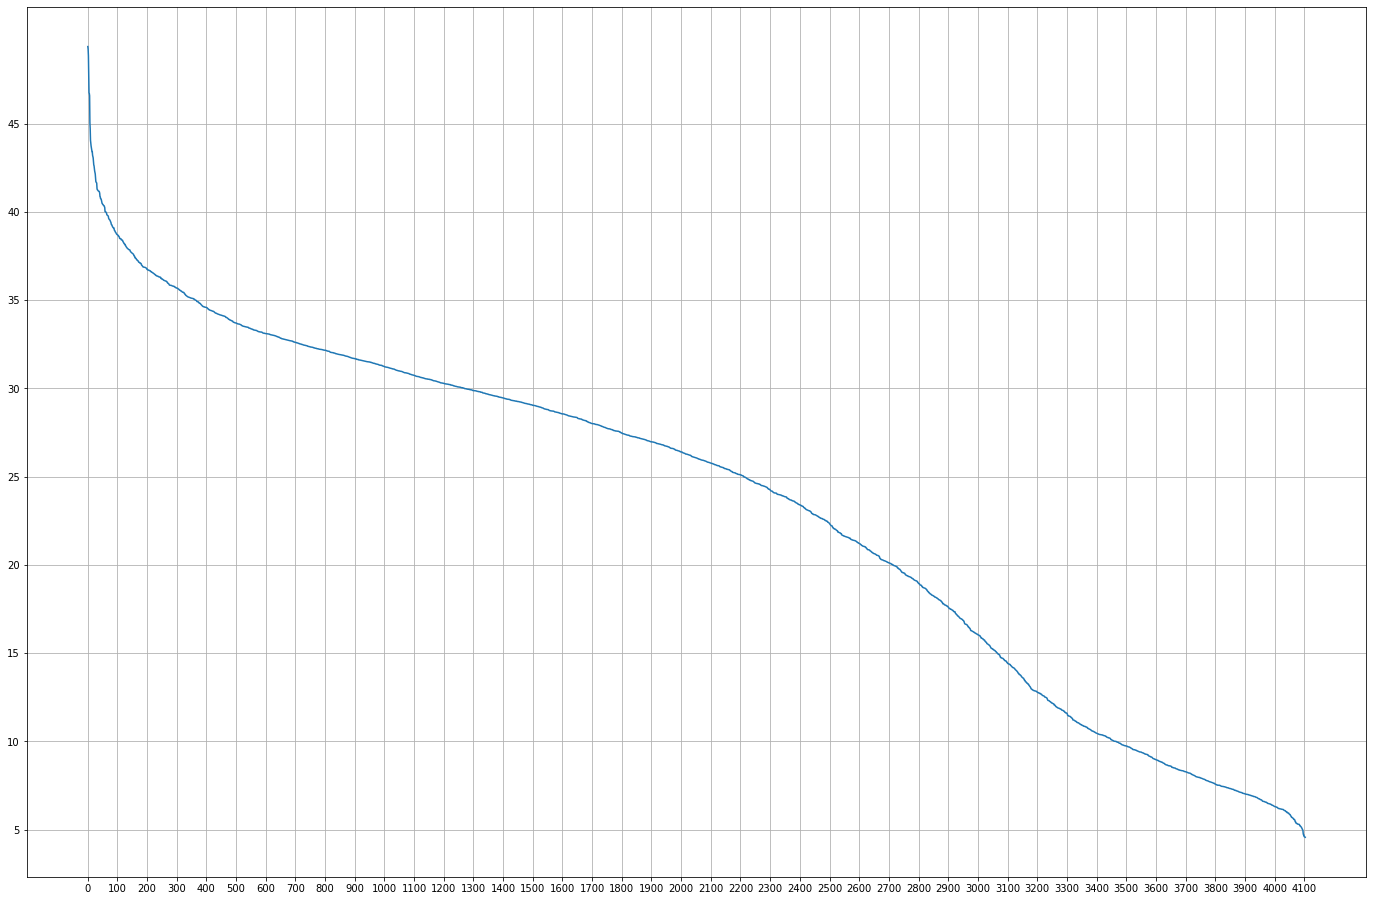

In [7]:
distances = sorted(dist[:,4], reverse=True)
plt.figure(figsize=(24,16))
plt.xticks(list(range(0,4103+1,100)))
plt.yticks(list(range(0,50,5)))
plt.grid()
plt.plot(list(range(1,4103+1)), distances)


In [12]:
from sklearn.cluster import DBSCAN

dbs = DBSCAN(eps=21, min_samples=3, n_jobs=-1)
clust=dbs.fit(features)
pins['Label']=clust.labels_
pins['Label'].value_counts()

-1    2453
 0    1601
 1      22
 7       4
 2       4
 8       4
 3       3
 6       3
 9       3
 5       3
 4       3
Name: Label, dtype: int64

In [ ]:
x=0
fig=plt.figure(figsize=(24,48))
img_index=1
for i in range(72*x,72*(x+1)):
	fig.add_subplot(12,6,img_index)
	plt.imshow(pins['Images'][i])
	plt.title(pins['Label'][i])
	img_index+=1
plt.show()
x+=1